In [1]:
import os
os.chdir('E:\GCN-based-GAE-main\Python') # set working directory

### A demo for generating patent and keyword vectors

In [2]:
from train import *
from gensim.models import Word2Vec

Before running the following codes, one must make sure that the following three files have been saved under the same directory (i.e., under the **Python** folder).

**patent.csv:** see patent_sample.csv

**annotation.csv:** see annotation_sample.csv

**pretrained_wordvectors.npy:** pretrained wordvectors for initializing patent vectors, which will be used as an input for **nn.Embedding** (see detailed descriptions in the pytorch documentation).

Explanations on selected hyperparameters

**representation_size:** dimension of keyword vectors

**embedding_dim:** dimension of patent vectors

**n_hidden**: parameter is effective only when you want to including an extra layer; ineffective in the case since we only have one layer

In [3]:
#%% train the model
args = namespace(max_features=50000, max_length=256,
                 graphdir='./', use_authors=False,
                 collate_coauthorship=False, representation_size=256, lr=1e-3, weight_decay=0,
                 out='./', epochs=200, batch_size=128, test_batch_size=128,
                 embedding_dim=256, embedding_dropout=0, max_norm=None, num_neighbors=5,
                 n_layers=1, n_hidden=256, dropout=0.5, representation_dropout=0,
                 representation_activation=None, representation_layer_norm=False,
                 decoder_bias=False, fastmode=False, scale_grad_by_freq=False,
                 globals_on_cpu=True, early_stopping=False, patience=20,
                 warm_start=True, use_cuda=torch.cuda.is_available(),
                 load_pretrained_embedding=True, workers=4)


target_start_year = 2008
target_end_year = 2010
data = load_data(args.graphdir, target_start_year=target_start_year, target_end_year=target_end_year, supervised=False,
                 with_authors=args.use_authors,
                 collate_coauthorship=args.collate_coauthorship,
                 undirected=True)


text_features, preprocessor = preprocess_text(args, data)


descriptors, representation, model, decoder, text_encoder, preprocessor, features = embed_control_variate(args, data)

Loading graph from tables in: ./
Loading patents...
N patents 1084
Setting idx to first column
Index type: int64
Loading annotations...


1084it [00:00, 362338.66it/s]
1122it [00:00, 281342.09it/s]
 36%|██████▍           | 385/1084 [00:00<00:00, 3822.10it/s]

N annotations 1122
Adding patent nodes
Inserting annotation edges
BiblioGraph with 1092 nodes (1084 papers) and 1122 edges.
Numericalize!
Converting node labels to integers
BiblioGraph with 1092 nodes (0 authors, 1084 papers, 8 subjects) and 1122 edges, average degree: 2.0549450549450547.
Preprocessing text...
Tokenizing...


 33%|██████            | 362/1084 [00:00<00:00, 3593.73it/s]

Building vocabulary...
Transforming into indices...
[1084 1085 1086 1087 1088 1089 1090 1091]
8
Networkx graph
Number of nodes: 1092
Number of edges: 1122
Preprocessing text...
Tokenizing...


100%|████████████████| 1084/1084 [00:00<00:00, 60383.36it/s]


Building vocabulary...
Transforming into indices...
Text feature dims torch.Size([1084, 256])
Creating DGL graph ...
DGL Graph
Number of nodes: 1092
Number of edges: 2244
Adding features
Feature size torch.Size([1092, 256])
Mapping subject nids to class label
Subj values [1084 1085 1086 1087 1088 1089 1090 1091]
Subject targets: tensor([0, 1, 2, 3, 4, 5, 6, 7], device='cuda:0')
Number of classes: 8
Computing global norm...
Norm
tensor([[1.0000],
        [1.0000],
        [1.0000],
        ...,
        [0.0135],
        [0.0030],
        [0.0071]])
Norm size torch.Size([1092, 1])
Loading model checkpoint from ./
Loading pretrained word embeddings...
Embedding(6703, 256, padding_idx=0, sparse=True)
GCNSampling(
  (dropout): Dropout(p=0.5, inplace=False)
  (activation): ReLU()
  (layers): ModuleList(
    (0): NodeUpdate(
      (dropout): Dropout(p=0.5, inplace=False)
      (dense): Linear(in_features=256, out_features=256, bias=True)
    )
  )
)
Linear(in_features=256, out_features=8, bia

Step      87 | Epoch   86 | Train Loss: 1.6424 | Eval loss: 1.6179 | Accuracy 1.0000
Step      88 | Epoch   87 | Train Loss: 1.6257 | Eval loss: 1.6075 | Accuracy 1.0000
Step      89 | Epoch   88 | Train Loss: 1.5935 | Eval loss: 1.5969 | Accuracy 1.0000
Step      90 | Epoch   89 | Train Loss: 1.6063 | Eval loss: 1.5865 | Accuracy 0.8750
Step      91 | Epoch   90 | Train Loss: 1.5701 | Eval loss: 1.5759 | Accuracy 0.8750
Step      92 | Epoch   91 | Train Loss: 1.5604 | Eval loss: 1.5653 | Accuracy 0.8750
Step      93 | Epoch   92 | Train Loss: 1.5586 | Eval loss: 1.5548 | Accuracy 0.8750
Step      94 | Epoch   93 | Train Loss: 1.5701 | Eval loss: 1.5444 | Accuracy 0.8750
Step      95 | Epoch   94 | Train Loss: 1.5618 | Eval loss: 1.5341 | Accuracy 0.8750
Step      96 | Epoch   95 | Train Loss: 1.5448 | Eval loss: 1.5237 | Accuracy 0.8750
Step      97 | Epoch   96 | Train Loss: 1.5362 | Eval loss: 1.5130 | Accuracy 0.8750
Step      98 | Epoch   97 | Train Loss: 1.5059 | Eval loss: 1.502

Step     185 | Epoch  184 | Train Loss: 0.5990 | Eval loss: 0.5625 | Accuracy 1.0000
Step     186 | Epoch  185 | Train Loss: 0.5754 | Eval loss: 0.5555 | Accuracy 1.0000
Step     187 | Epoch  186 | Train Loss: 0.6216 | Eval loss: 0.5486 | Accuracy 1.0000
Step     188 | Epoch  187 | Train Loss: 0.4852 | Eval loss: 0.5416 | Accuracy 1.0000
Step     189 | Epoch  188 | Train Loss: 0.6182 | Eval loss: 0.5347 | Accuracy 1.0000
Step     190 | Epoch  189 | Train Loss: 0.6053 | Eval loss: 0.5274 | Accuracy 1.0000
Step     191 | Epoch  190 | Train Loss: 0.5875 | Eval loss: 0.5198 | Accuracy 1.0000
Step     192 | Epoch  191 | Train Loss: 0.4832 | Eval loss: 0.5121 | Accuracy 1.0000
Step     193 | Epoch  192 | Train Loss: 0.6191 | Eval loss: 0.5045 | Accuracy 1.0000
Step     194 | Epoch  193 | Train Loss: 0.5962 | Eval loss: 0.4968 | Accuracy 1.0000
Step     195 | Epoch  194 | Train Loss: 0.6078 | Eval loss: 0.4891 | Accuracy 1.0000
Step     196 | Epoch  195 | Train Loss: 0.5271 | Eval loss: 0.481

The training process generally can achieve 100% accuracy for a smaller dataset. For a larger dataset, a larger value of **epochs** will be needed. However, the value of **epochs** should not be set too large for avoiding potential overfitting.

### save results

In [ ]:
model_PATH = 'model' + str(target_end_year) + 'all.pt'
text_encoder_PATH = 'text_encoder' + str(target_end_year) + 'all.pt'

model = torch.load(model_PATH)
text_encoder = torch.load(text_encoder_PATH)
descriptors = np.load(r'descriptor_' + str(target_end_year) + 'all.npy', allow_pickle=True)
descriptors = np.array([i.rstrip() for i in descriptors])
representation = np.load(r'representation_' + str(target_end_year) + 'all.npy', allow_pickle=True)

### technology intensity coordinates

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


def transformed_vector(x):
    return (torch.matmul(W, x) + b).numpy()
def cs(a, b):
    return (a.dot(b)) / (np.linalg.norm(a) * np.linalg.norm(b))




W, b = list(model.layers[0].parameters())
W, b = W.detach(), b.detach()
doc_vectors = text_encoder(text_features).mean(1).detach()
transformed_doc = [transformed_vector(i) for i in doc_vectors]
#%%

rep_dict = dict(zip(descriptors, representation))
AI_term = ['machine learning', 'artificial intelligence', 'deep learning',
           'neural network', 'data mining', 'intelligence system', 'NLP']
DLT_term = ['distributed ledger', 'blockchain',
            'smart contract', 'bitcoin', 'cryptocurrency', 'encryption', 'ethereum']


def technological_ccordinates(doc_vector):
    AI_axis = np.max([cs(rep_dict[i], doc_vector)
                      for i in AI_term if i in rep_dict])
    DLT_axis = np.max([cs(rep_dict[i], doc_vector)
                       for i in DLT_term if i in rep_dict])
    return (AI_axis, DLT_axis)

tech_ccordinates = [technological_ccordinates(doc_vector) for doc_vector in transformed_doc]

AI_axes = [i[0] for i in tech_ccordinates]
DLT_axes = [i[1] for i in tech_ccordinates]

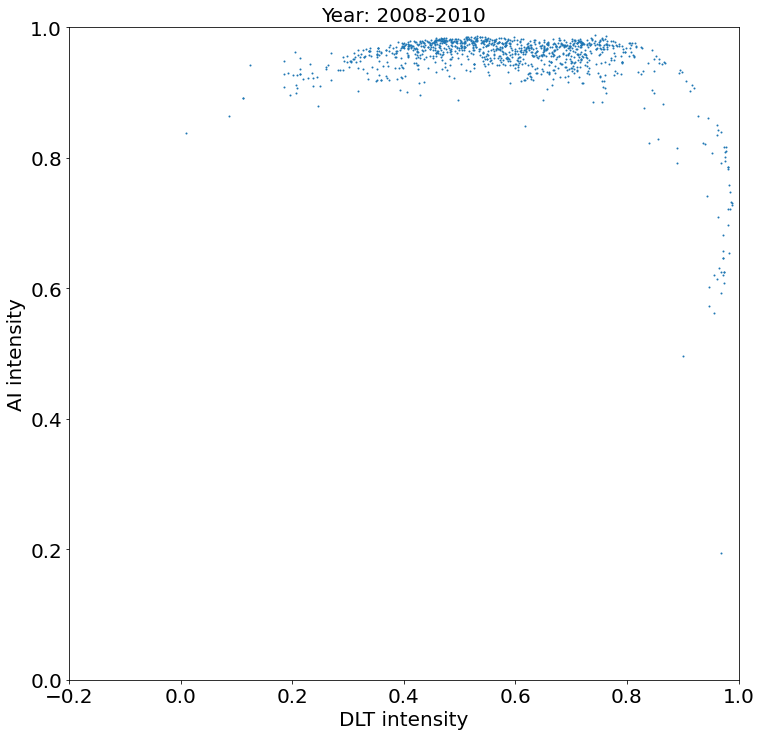

In [5]:
#%% plot
plt.figure(figsize=(12, 12))
plt.scatter(DLT_axes, AI_axes, s=1)
plt.xlabel('DLT intensity', fontsize=20)
plt.ylabel('AI intensity', fontsize=20)
plt.title('Year: ' + str(target_start_year) + '-' + str(target_end_year), fontsize=20)
plt.xlim(-0.2, 1)
#plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tick_params(labelsize=20)